# Plotting and Visualization

Creating visualizations is one of the most important tasks in data analysis!

It may be a part of the exploratory process - for example to identify outliers or needed data transformations, or as a way of generating ideas for models. 

Let's start by listing the components of a graph:
- **figure** the white canvas out plot will be on
- **subplots** if we want smaller multiple graphs in our figure
- **axis labels** 
- **marker, colors, line styles**
- **legend**

We will start with `matplotlib` library, a plotting package designed for creating (mostly 2D) plots. 

In [21]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)

import matplotlib
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(8, 4))
np.set_printoptions(precision=4, suppress=True)

In [22]:
# interactive plotting in jupyter
%matplotlib notebook

## A Brief matplotlib API Primer

You can create a plot by using `plt.plot()`


<IPython.core.display.Javascript object>


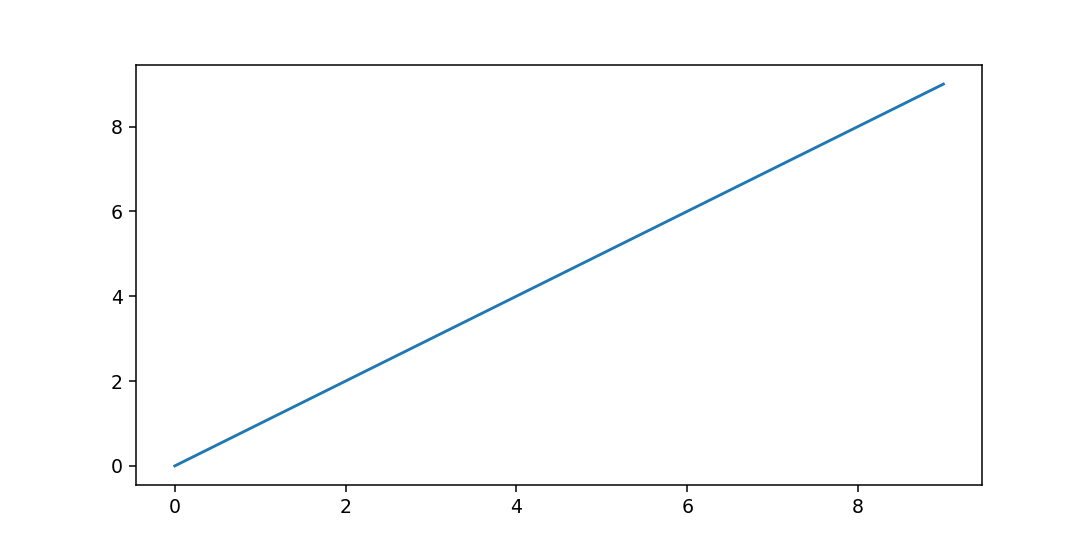

In [23]:
# prepare sample data
data = np.arange(10)
data
plt.plot(data) 

### Figures and Subplots
Plots in matplotlib reside within a `Figure` object. You can create a new figure with `plt.figure()`:

<IPython.core.display.Javascript object>


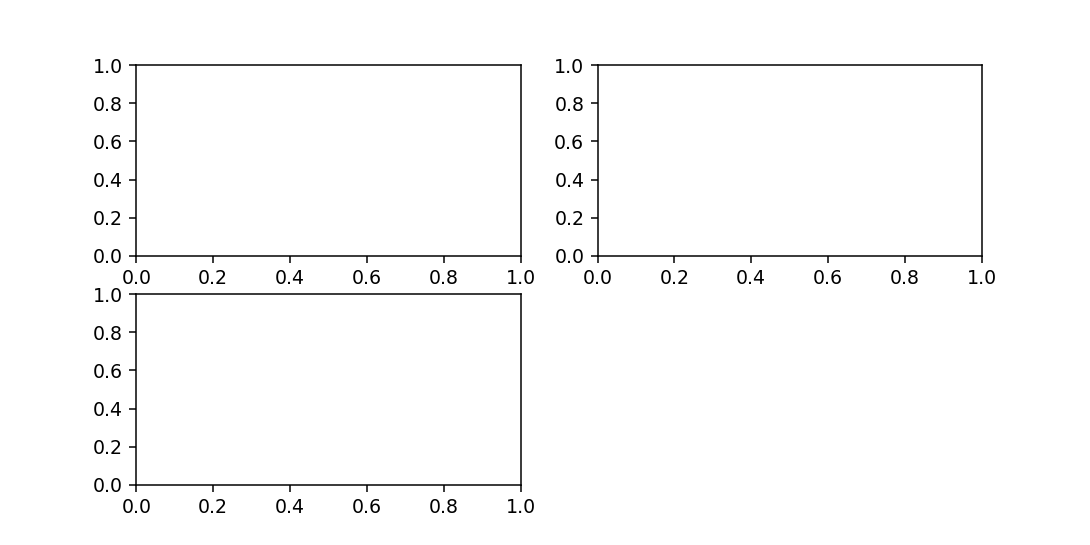

In [24]:
#creating a new figure
fig = plt.figure()

In Jupyter nothing will be shown until we use a few more commands. `plt.figure()` has a number of options , for example `figsize`, which guearantee the figure has a certain size and aspect ratio if saved to disk. 

In order to make a plot, we have to create one or more `subplots`, using the `add_subplot()` function. Here in the following cell, the first two params means that the figure should be 2x2 (up to four plots in total). When we run the next cell, it adds the three subplots to the above figure!

In [25]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

<IPython.core.display.Javascript object>


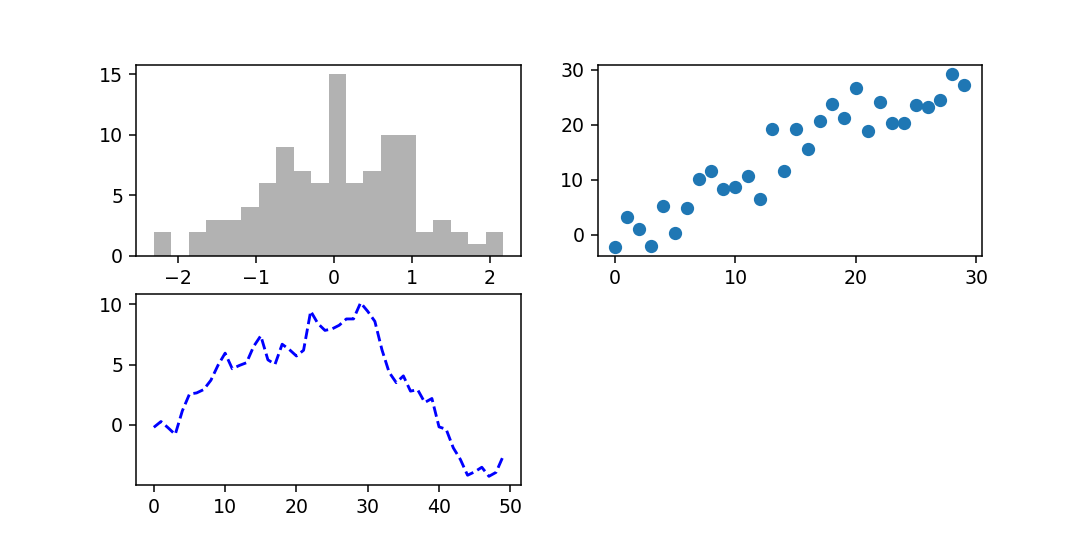

In [26]:
# run in the same cell
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [27]:
# adding some random data to the graph
# it automatically picks the last active subgraph
# stype is defined using 'k--', black with dashes
plt.plot(np.random.randn(50).cumsum(), 'b--')

In [28]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3) #1st subplot
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))#3rd subplot

In [29]:
# end the interactive mode
plt.close('all')

`Axes` can be easily indexed like a two-dimensional array; for example `axes[0,1]`. You can also indicate whether subplots should have the same x- or y-axis using `sharex` and `sharey`, respectively. This is useful when you are compring data on the same scale, otherwise matplotlib autoscales plot limits independently. 

<IPython.core.display.Javascript object>


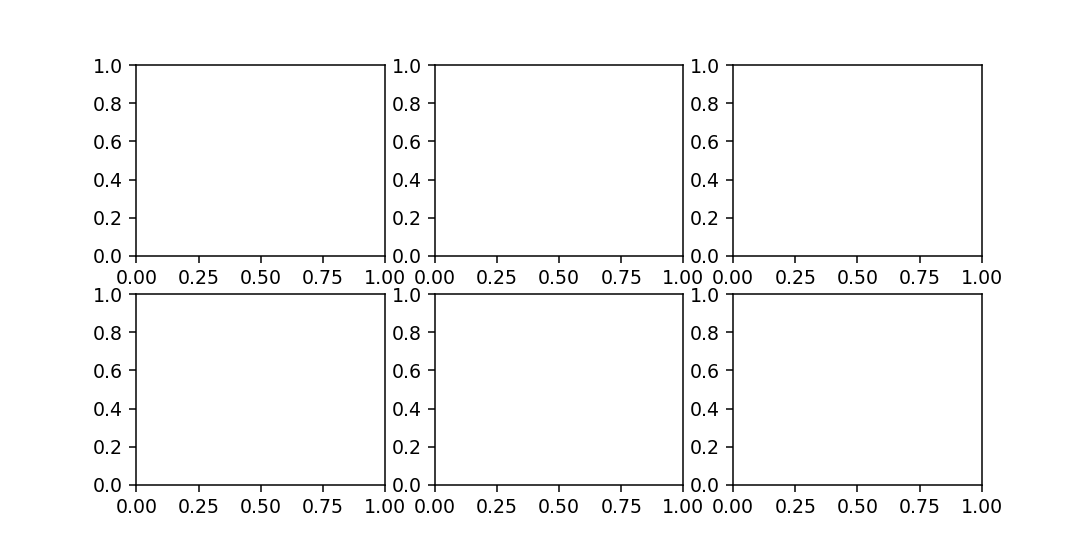

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB67715108>,
      dtype=object)

In [30]:
# create a figure with a grid of subplots using plt.subplots(row,column)
fig, axes = plt.subplots(2, 3)
axes
# use 'sharex=True', 'sharey=True' to use same axis for all plots

#### Adjusting the spacing around subplots
By default matplotlib creates spacing around the subplots. You could utilize `subplots_adjust()` function parameters to control the space around subplots.

```python
subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)```

<IPython.core.display.Javascript object>


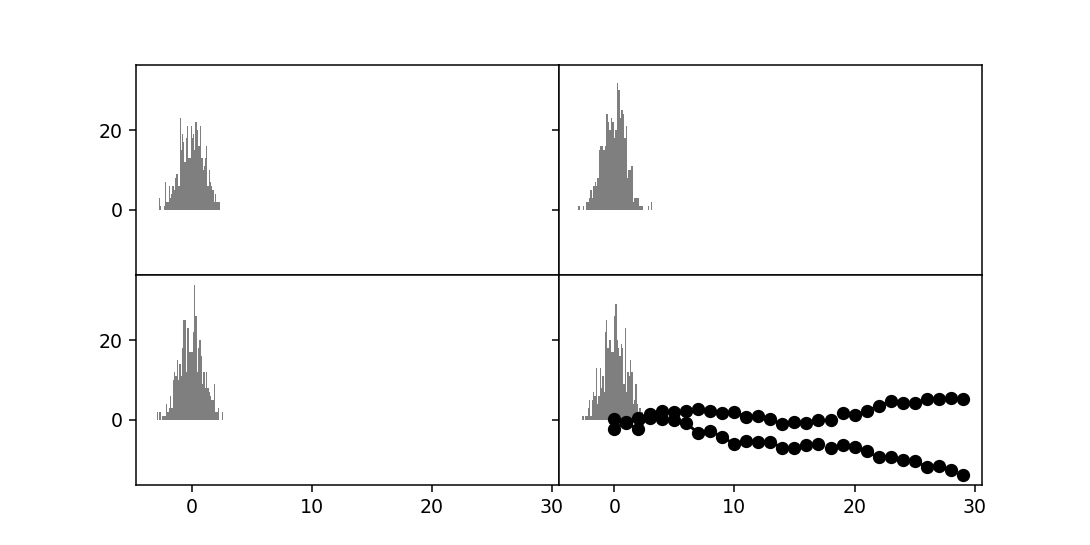

In [36]:
# creating a plot with 0 space btw plots
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles
Matplotlib's main `plot` function accepts arrays of x and y coordinates and optionally a string abbreviation indicating color and line style. 

green dashes:
- ax.plot(x, y, 'g--')

green dashes, expresses explicitly:
- ax.plot(x, y, linestyle='--', color='g')

Line plots can additionally have *markers* to highlight the actual data points- color followed by the marker type and line styles:

<IPython.core.display.Javascript object>


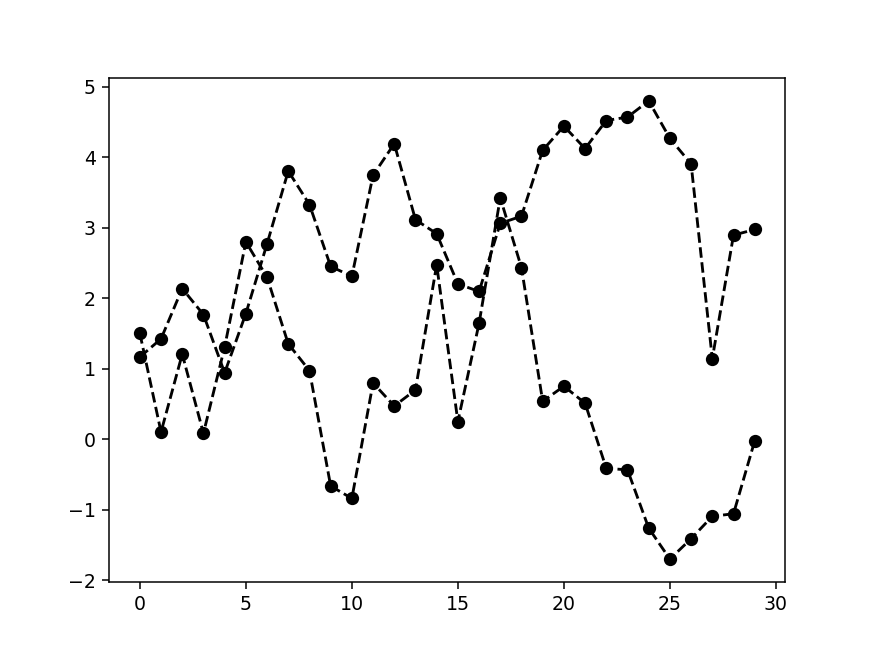

<IPython.core.display.Javascript object>


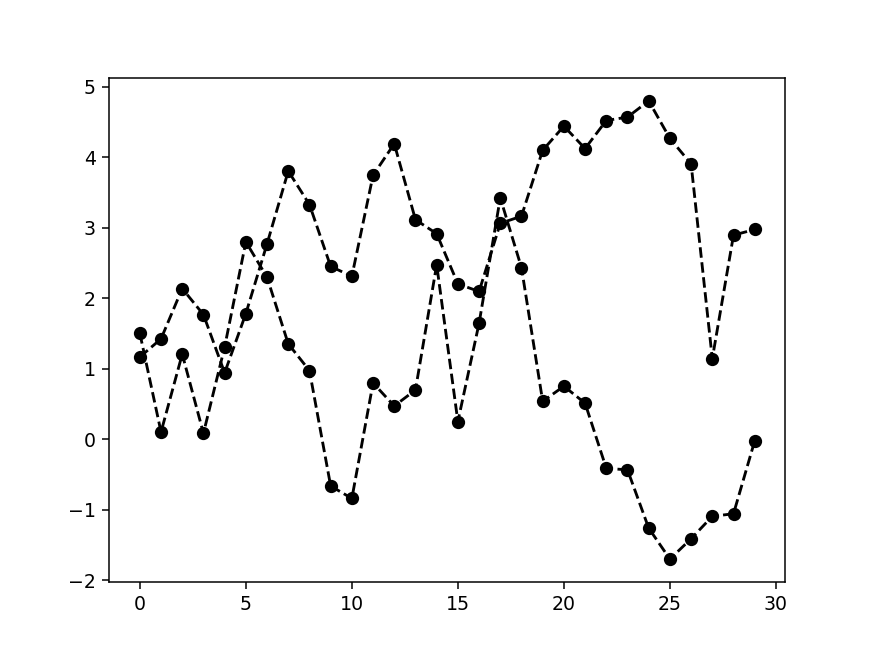

In [13]:
plt.figure()

In [37]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

In [38]:
# alternative
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [39]:
plt.close('all')

For line plots the subsequent ploints are linearly interpolated by default, this can be altered by using the `drawstyle` option:

<IPython.core.display.Javascript object>


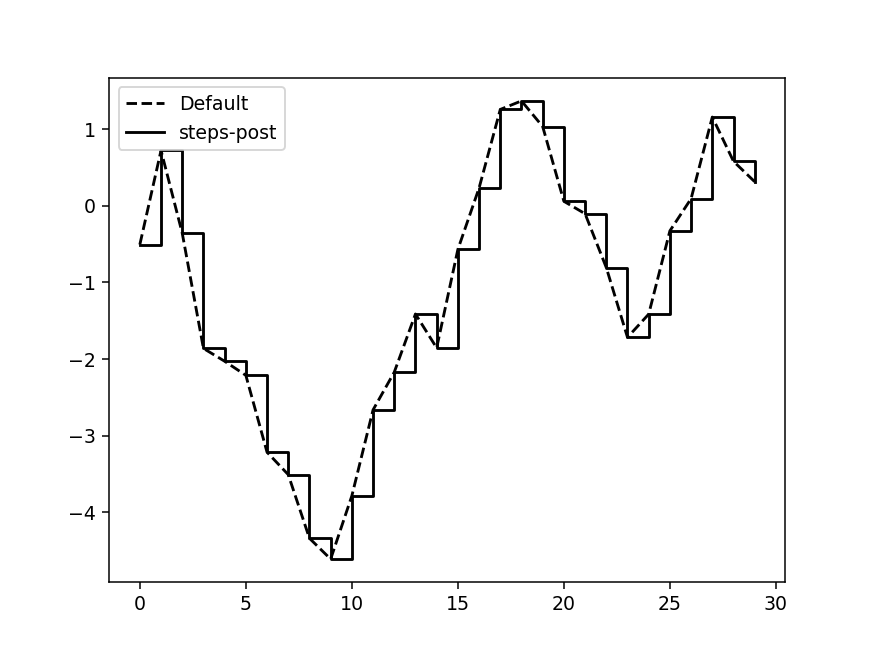

In [17]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels
The `pyplot` interface, designed for interactive use, consists of methods like `xlim`, `xticks`, and `xticklabels`. These control the plot range, tick locations, and tick labels, respectively.  You can call these 
- with no arguments. eg. `plt.xlim()` which then will return the current x-axis plotting range
- with parameters. eg. `plt.xlim([0,10])` to sets the x-axis range to 0 to 10.

<IPython.core.display.Javascript object>


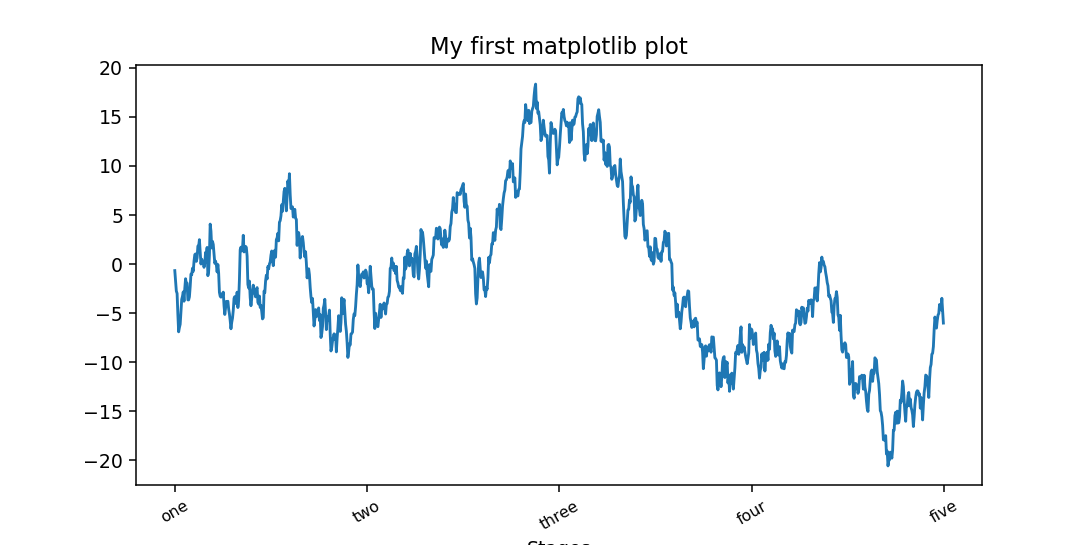

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [41]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [42]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 5.113785609900074, 'Stages')

Alternative way to specify the titles/labels:
```python
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)```

#### Adding legends
Legends are critical elements for identifying plot elements. You can use the `label` parameter when adding each piece of the plot and when done, call `legend()` function. See the example in below:

<IPython.core.display.Javascript object>


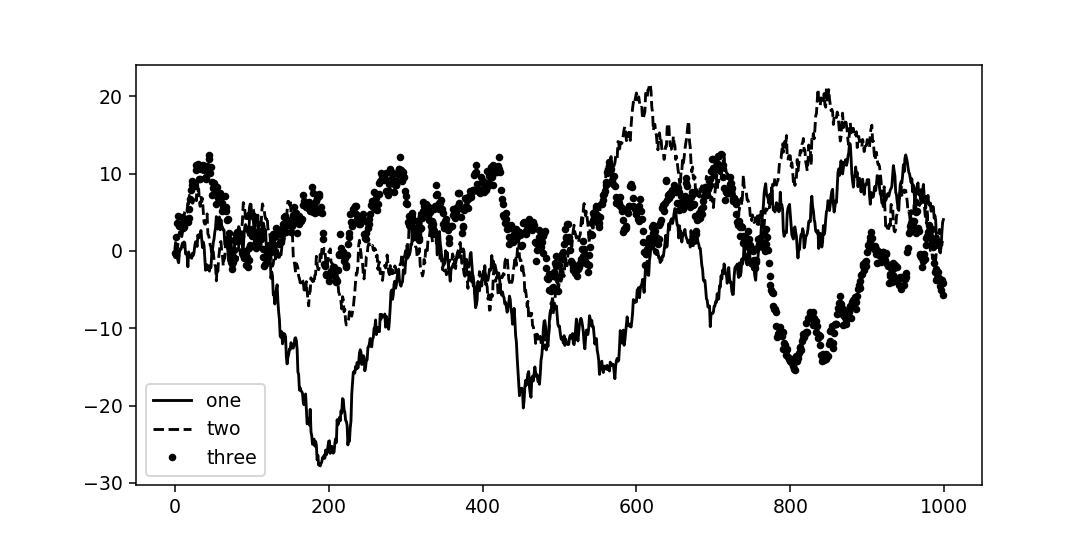

In [43]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [44]:
ax.legend(loc='best')

### Saving Plots to File
You can save the active figure to a file using the `plt.savefig()` function. You can specify the file type and the name of the file. Other valuable options to keep in mind are `dpi` which controls the dots-per-inch resolution, and `bbox-inches` which can trim the whitespace around the actual figure. 

In [ ]:
plt.savefig('figpath.svg')

To save the same figure in png format with 400 dpi with minimal space around the figure:

In [ ]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

### `matplotlib` Configuration
matplotlib comes configured with color schemes and defaults, however you can change them as you wish! One way to modify the configuration is to use the `rc()` method. 

Setting the global default figure size to 10x10:
```python
plt.rc('figure', figsize=(10, 10))```
params: component to customize, customization option

Writing down the options in the program as a dict:
```python
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)```

**End**

**Source:** Python for Data Analysis by Wes McKinney, Chapter 9